 

# Homework2.2 - MINIST(CNN)
Using `CNN` to classify MINIST.

<font color='red'> Send this file to email: shuchao_shanty@126.com after finish the code in this file. </font>
<br><br>
<font color='red'> Remember ro rename this file to `studentID+homework2.2`, e.g., `20183290375+homework2.2`</font>




# NAME: MD MAHFUZUR RAHMAN 罗尼
## Student ID: `20183290375`
### Submission Date: `5.22.2021`

## Prepare
Now that we've seen the results of an artificial neural network model on the <a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST dataset</a>, let's work the same data with a <a href='https://en.wikipedia.org/wiki/Convolutional_neural_network'>Convolutional Neural Network</a> (CNN).
Make sure to watch the theory lectures! You'll want to be comfortable with:
* convolutional layers
* filters/kernels
* pooling
* depth, stride and zero-padding

Note that in this exercise there is no need to flatten the MNIST data, as a CNN expects 2-dimensional data.

## Perform standard imports
Torchvision should have been installed by the environment file during setup. If not, you can install it now. At the terminal with your virtual environment activated, run<br>
<pre>conda install torchvision -c pytorch
<em>or</em>
pip install torchvision</pre>

Run the cell below to load the libraries needed for this exercise 

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import time
import torch
import torchvision

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

## 1.  Load the MNIST dataset
PyTorch makes the MNIST dataset available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. The first time it's called, the dataset will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.
### Define transform
As part of the loading process, we can apply multiple transformations (reshape, convert to tensor, normalize, etc.) to the incoming data.<br>For this exercise we only need to convert images to tensors. 

In [38]:
transform = transforms.ToTensor()

### 1.1  Load the training set

In [39]:
# CODE HERE
train_data = datasets.FashionMNIST(root='../Data', train = True, download = True, transform=transform)
pass
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

### 1.2  Load the test set
There's a companion set of MNIST data containing 10,000 records accessible by setting train=False. As before, torchvision will only download this once, and in the future will look for the local copy.

In [40]:
# CODE HERE
test_data = datasets.FashionMNIST(root='../Data', train = True, download = True, transform=transform)
pass
test_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

## 2.  Create data loaders
Use DataLoader to create a <tt>train_loader</tt> and a <tt>test_loader</tt>. Batch sizes should be 10 for both.(If your graphics card memory is not enough, you can set this value to be smaller)</tt></a>.

In [41]:
# CODE HERE
train_loader = DataLoader(train_data,batch_size=10, shuffle=True)
test_loader = DataLoader(test_data,batch_size=10, shuffle=False)
torch.manual_seed(101)  # for consistent results

pass

## 3. Examine a batch of images
Use DataLoader, <tt>make_grid</tt> and matplotlib to display the first batch of 10 images.<br>
OPTIONAL: display the labels as well

In [42]:
# CODE HERE
for images, label in train_loader:
    break
pass



In [43]:
images.shape

torch.Size([10, 1, 28, 28])

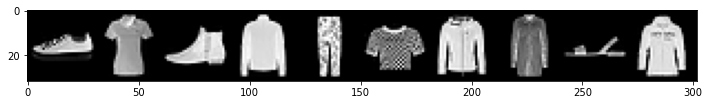

In [44]:
im = make_grid(images, nrow=10)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

## 4.  Define the CNN model
In the previous section we used only fully connected layers, with an input layer of 784 (our flattened 28x28 images), hidden layers, and an output size representing 10 possible digits.

This time we'll employ convolutional layers and pooling layers before feeding data through fully connected hidden layers to our output. 

You can freely choose the number of network layers and parameters to build a suitable model.

In [45]:
# CODE HERE

class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,16*5*5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
    
        return F.log_softmax(X,dim=1)
    
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [46]:
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [47]:
for p in model.parameters():
    print(p.numel())

54
6
864
16
48000
120
10080
84
840
10


In [48]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'_____\n{sum(params):>6}')
count_parameters(model)

    54
     6
   864
    16
 48000
   120
 10080
    84
   840
    10
_____
 60074


## 5.  Define loss function & optimizer
Define a loss function called "criterion" and an optimizer called "optimizer".<br>
You can use any functions you want, although we used Cross Entropy Loss and Adam (learning rate of 0.001) respectively.

In [49]:
# CODE HERE
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)


## 6.  Train the model
You can freely choose the training epoch to get a better performance model. During the training iteration, you should print out loss and accuracy in real time (optional)

In [50]:
# CODE HERE
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    
    for b,(X_train,y_train) in enumerate(train_loader):
        b+=1
        
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%600 == 0:
            print(f"EPOCH: {i} BATCH: {b} LOSS: {loss.item()}")
    
    
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    with torch.no_grad():
        for b,(X_test,y_test) in enumerate(test_loader):
            y_val = model(X_test)
        
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)


current_time = time.time()

total = current_time - start_time

print(f"Training took {total/60} minutes")

EPOCH: 0 BATCH: 600 LOSS: 1.3324432373046875
EPOCH: 0 BATCH: 1200 LOSS: 0.28042569756507874
EPOCH: 0 BATCH: 1800 LOSS: 0.7852548360824585
EPOCH: 0 BATCH: 2400 LOSS: 0.3696141541004181
EPOCH: 0 BATCH: 3000 LOSS: 0.4325421452522278
EPOCH: 0 BATCH: 3600 LOSS: 0.7253780364990234
EPOCH: 0 BATCH: 4200 LOSS: 0.45203280448913574
EPOCH: 0 BATCH: 4800 LOSS: 0.27422118186950684
EPOCH: 0 BATCH: 5400 LOSS: 0.3582357168197632
EPOCH: 0 BATCH: 6000 LOSS: 0.04004999250173569
EPOCH: 1 BATCH: 600 LOSS: 0.37097734212875366
EPOCH: 1 BATCH: 1200 LOSS: 0.06802817434072495
EPOCH: 1 BATCH: 1800 LOSS: 0.4447682797908783
EPOCH: 1 BATCH: 2400 LOSS: 0.23193800449371338
EPOCH: 1 BATCH: 3000 LOSS: 0.329153835773468
EPOCH: 1 BATCH: 3600 LOSS: 0.29589343070983887
EPOCH: 1 BATCH: 4200 LOSS: 0.3816991448402405
EPOCH: 1 BATCH: 4800 LOSS: 0.3294060528278351
EPOCH: 1 BATCH: 5400 LOSS: 0.7116307020187378
EPOCH: 1 BATCH: 6000 LOSS: 0.15816453099250793
EPOCH: 2 BATCH: 600 LOSS: 0.5400347709655762
EPOCH: 2 BATCH: 1200 LOSS: 0.

## 7.  Evaluate Test Data
Use the test set to test the performance of the model, and output at least two things: loss and accuracy.

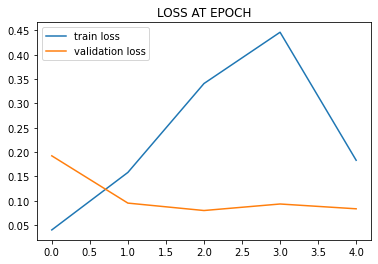

In [51]:
# CODE HERE
plt.plot(train_losses,label ='train loss')
plt.plot(test_losses, label ='validation loss')
plt.title('LOSS AT EPOCH')
plt.legend()


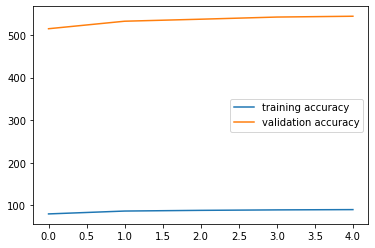

In [52]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.legend();
                  

In [53]:
test_load_all = DataLoader(test_data, batch_size = 10000, shuffle= False)

with torch.no_grad():
    correct = 0
    for X_test,y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()


In [54]:
correct

tensor(54400)

In [55]:
correct.item()

54400

In [56]:
correct.item()/len(test_data)

0.9066666666666666

In [57]:
100*correct.item()/len(test_data)

90.66666666666667

In [58]:
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[ 872,    0,   23,   15,    1,    0,   91,    0,    3,    0],
       [   0,  976,    1,    5,    0,    0,    1,    0,    0,    1],
       [  12,    0,  873,    4,   73,    0,   89,    0,    1,    0],
       [  12,    8,    7,  955,   45,    0,   25,    0,    0,    0],
       [   0,    1,   56,   18,  873,    0,   73,    0,    3,    0],
       [   2,    0,    0,    0,    0,  960,    0,    8,    0,    5],
       [ 123,    1,   47,   22,   52,    0,  687,    0,    3,    0],
       [   0,    0,    0,    0,    0,   34,    0,  902,    3,   27],
       [   2,    2,    1,    2,    6,    1,    4,    0,  955,    0],
       [   0,    0,    0,    0,    0,    1,    0,   45,    0,  988]],
      dtype=int64)

In [59]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 872    0   23   15    1    0   91    0    3    0]
 [   0  976    1    5    0    0    1    0    0    1]
 [  12    0  873    4   73    0   89    0    1    0]
 [  12    8    7  955   45    0   25    0    0    0]
 [   0    1   56   18  873    0   73    0    3    0]
 [   2    0    0    0    0  960    0    8    0    5]
 [ 123    1   47   22   52    0  687    0    3    0]
 [   0    0    0    0    0   34    0  902    3   27]
 [   2    2    1    2    6    1    4    0  955    0]
 [   0    0    0    0    0    1    0   45    0  988]]


In [60]:
test_data[2019]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0118, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0275, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0078, 0.0000, 0.0000, 0.2980, 0.6627, 0.7529, 0.5647,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0196, 0.0000, 0.0000, 0.6196, 0.7020, 0.5137, 0.5137, 0.6588,
           0.7961, 0.3412, 0.0000, 0.0000, 

In [61]:
test_data[2019][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0118, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0275,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0078, 0.0000, 0.0000, 0.2980, 0.6627, 0.7529, 0.5647, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0196,
         0.0000, 0.0000, 0.6196, 0.7020, 0.5137, 0.5137, 0.6588, 0.7961, 0.3412,
         0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000

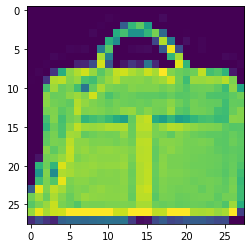

In [62]:
plt.imshow(test_data[2019][0].reshape(28,28))

In [63]:
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[2019][0].view(1,1,28,28))

In [64]:
new_prediction.argmax( )

tensor(8)

## Great job!